Experimentumgebung zum Vergleich von Deep Learning Algorithmen zur Vorhersage von multivariaten Zeitreihen

Testumgebung:
- Lokale Jupyter Lab Umgebung mit Python 3 als Kernal

Datensatz:
- Ankunftszahlen von Flüchtlingen in Europa
- Wetterdaten, welche in der Regel stark mit den Sea Arrival Daten korrelieren

Problemstellung:

Deep Learning Algorithmen stellen eine neue Mögichkeit dar um multivariate Zeitreihen vorherzusagen. In der Literatur ist es oft so das gekünstelte Datensätze zur vorhersage verwendet werden. Außerdem bezieht sich ein großteil der Forschung auf univariate Zeitreihenprognose und im Kontext von Finanzdaten.

Ebenfalls ist es in der Literatur häufig so, dass es unterschiedliche Meinungen zu den Modellen gibt. In einigen Ausarbeitungen wird behauptet, dass lineare Modelle den deep learning Modellen teils überlegen sind und in andere widerum das Gegenteil.


Zielsetzung:

Aus diesem Grund soll anhand eines realen Datensatzes ein Experiment durchgeführt werden, welches in der IBM momentan ansteht.


Folgende Modelle sollen zur Prognose von Multivariatenzeitreihen deshalb verglichen werden:

- VAR
- Arimax
- RNN LSTM
- RNN GRU
- CNN
- SARIMAX = Seasonale Erweiterung

Verwendete Metriken:
- MAE
- MPE
- Accuracy


Die Länge der Zeitreihe wird verändert Trainingsdaten viel-wenig

Der Forecasting Zeitraum wird getestet 1 Tag 1 Woche .....

Hyperparameter werden verändert Batch, Epochen








In [51]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import scipy
import numpy as np
import math
from matplotlib import pyplot
%matplotlib inline  

from pandas.plotting import autocorrelation_plot


In [52]:
df = pd.read_csv("Sea arrivals monthly.csv", sep=";" ,header=0,parse_dates=True ,squeeze=True)

In [53]:
df_new = df.set_index("year")

Bei Time Series unterscheidet man grundsätzlich zwischen 2 Methoden:
- Time Series Analysis
    --> Dabei handelt es sich um die Analyse des Datensatzes, hier wird versucht das "Warum" der Zeitreihe zu erforschen
- Time Series Forecasting
    --> Bei Forecasting/Prognostizieren wird versucht aufgrund von historischen Daten der Verlauf der Zeitreihe in der Zukunft vorherzusagen

In [54]:
# Ausgabe der statistischen Werte
df.describe()

,month,year,individuals
count,78.000000,78.000000,78.000000
mean,6.269231,2017.769231,24393.153846
std,3.466624,1.899577,39182.961005
min,1.000000,2015.000000,1187.000000
25%,3.000000,2016.000000,7115.500000
50%,6.000000,2018.000000,11788.000000
75%,9.000000,2019.000000,20270.750000
max,12.000000,2021.000000,221721.000000


In [55]:
#size of our Dataframe
df.size

234

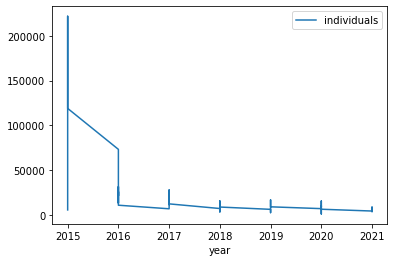

In [56]:
df.plot(x = "year", y = "individuals")

In [57]:
df['date'] = pd.to_datetime(df[['year','month']].assign(day=1)).dt.to_period('M')

In [58]:
df = df.set_index("date")

In [59]:
df.index=df.index.to_timestamp()

In [60]:
df = df.drop(["month", "year"], axis =1 )

In [61]:
df.to_dict()

{'individuals': {Timestamp('2015-01-01 00:00:00', freq='MS'): 5637,
  Timestamp('2015-02-01 00:00:00', freq='MS'): 7298,
  Timestamp('2015-03-01 00:00:00', freq='MS'): 10481,
  Timestamp('2015-04-01 00:00:00', freq='MS'): 29924,
  Timestamp('2015-05-01 00:00:00', freq='MS'): 39693,
  Timestamp('2015-06-01 00:00:00', freq='MS'): 54681,
  Timestamp('2015-07-01 00:00:00', freq='MS'): 78518,
  Timestamp('2015-08-01 00:00:00', freq='MS'): 130924,
  Timestamp('2015-09-01 00:00:00', freq='MS'): 163742,
  Timestamp('2015-10-01 00:00:00', freq='MS'): 221721,
  Timestamp('2015-11-01 00:00:00', freq='MS'): 155080,
  Timestamp('2015-12-01 00:00:00', freq='MS'): 118916,
  Timestamp('2016-01-01 00:00:00', freq='MS'): 73208,
  Timestamp('2016-02-01 00:00:00', freq='MS'): 61127,
  Timestamp('2016-03-01 00:00:00', freq='MS'): 37041,
  Timestamp('2016-04-01 00:00:00', freq='MS'): 13291,
  Timestamp('2016-05-01 00:00:00', freq='MS'): 22294,
  Timestamp('2016-06-01 00:00:00', freq='MS'): 24646,
  Timestam

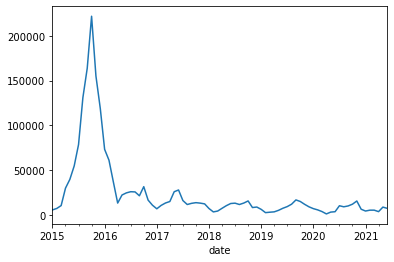

In [62]:

df.individuals.plot()


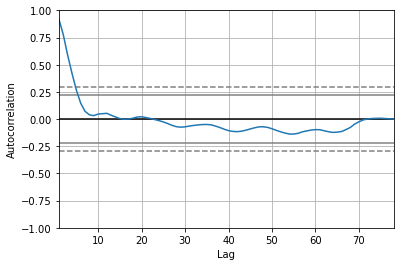

In [63]:
autocorrelation_plot(df)

In [64]:
df.index

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
      

In [65]:
decompose= sm.tsa.seasonal_decompose(df, model="additive")


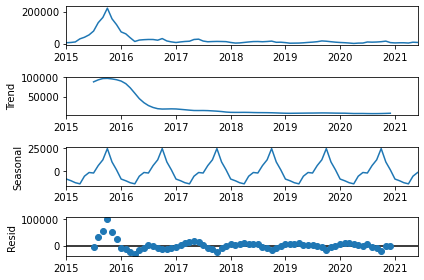

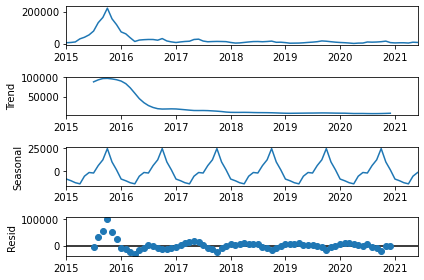

In [66]:
decompose.plot()



Es ist zu sehen, dass die Arrival Daten starken seasonalen Schwankungen unterliegen, ebenfalls ist zu erkennen, dass seit 2015 ein Abwärtstrend existiert
Diese Analyse fällt unter den Begriff Time Series ANALYSIS


- Um die Seasonalen Schwankungen mit zuberücksichtigen wird das SARIMA Modell verwendet

In [67]:
#df.plot(y="individuals")


In [68]:
# Average Arrivals per Year
#df.individuals.resample("Y").mean().plot(figsize= (12,5))

Im nächsten Schritt muss unsere Zeitreihe in ein supervised ML Problem überführt werden:
- Dies geschieht mit sogenannten lags, bei dem der vorherige Wert den Ausgangspunkt für den zukünftigen Wert bildet
- Ebenfalls müssen wir den np Array wider zu einem DF umformieren

In [69]:
temps = df["individuals"].values
temps
df_new = pd.DataFrame(temps, columns=['individuals']) 

In [70]:
df_new

,individuals
0,5637
1,7298
2,10481
3,29924
4,39693
...,...
73,5362
74,5384
75,3729
76,8791


In [71]:
from pandas import concat

In [72]:
shit_df= concat([df_new.shift(1), df_new], axis=1)

In [73]:
shit_df.columns = ["individuals","individuals + 1"]

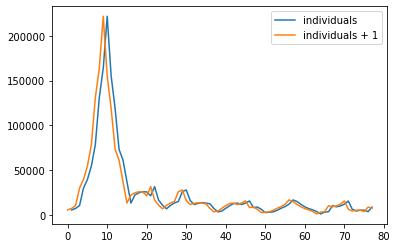

In [74]:
shit_df.plot()

In [75]:
# Korrelation zwischen lags
corr = shit_df.corr()

In [76]:
corr

,individuals,individuals + 1
individuals,1.000000,0.920264
individuals + 1,0.920264,1.000000


Es scheint eine Korrelation vorhanden zu sein, allerdings ist dies nur ein erster Indikator

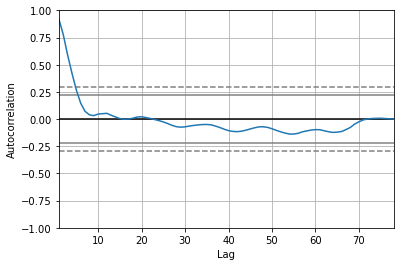

In [77]:
autocorrelation_plot(df_new)

In [78]:
from statsmodels.graphics.tsaplots import plot_acf

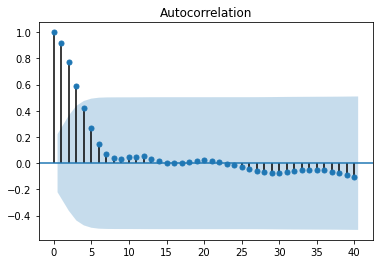

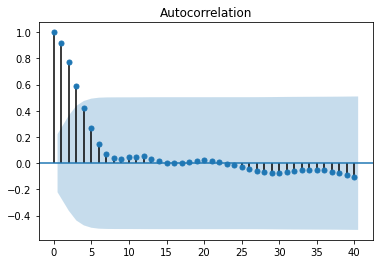

In [79]:
# Autokorrelation der Zeitreihe
plot_acf(df_new, lags =40)


Die Zeitreihe ist nicht Stationär, da die Korrelation immer weiter abnimmt

In [80]:
from pandas.plotting import lag_plot

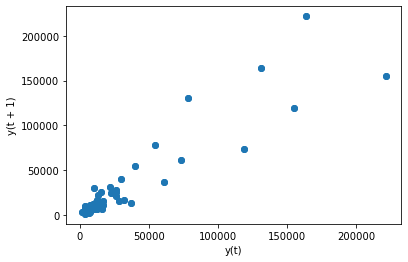

In [81]:
lag_plot(shit_df)

In [82]:
# Make the Time Series Stationary / integreted model 1 denonted by d parameter for difference
df_diff = df.diff(periods=1)


In [83]:
df_diff = df_diff[1:]

In [84]:
df_diff = df_diff[1:]

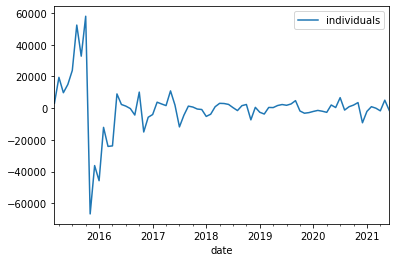

In [85]:
df_diff.plot()

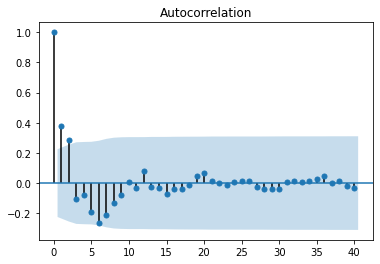

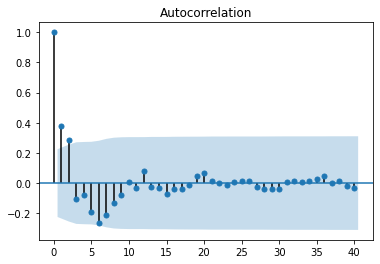

In [86]:
# Zeitreihe diff Autokorrelation
# ACF dropt schneller gegen 0 = non-stationary
plot_acf(df_diff, lags =40)

In [87]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

In diesem Abschnitt verwenden wir AR oder auch Auto Regressiv Modell um eine erst Vorhersage zu treffen
Als Trainingsdaten nehmen wir 

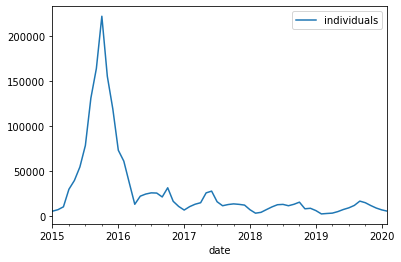

In [88]:
df[:62].plot()

In [89]:

train = df[:70]
# last 8 values
test = df[70:]

pred =[]

In [90]:
# Aus der Vorherigen Analyse geht hervor das wir einen seasonalen Trend haben
Ar_model = AutoReg(train, lags = 17, seasonal=True,)
Ar_fit = Ar_model.fit()

C:\Users\hornd\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [91]:
pred = Ar_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic = False)

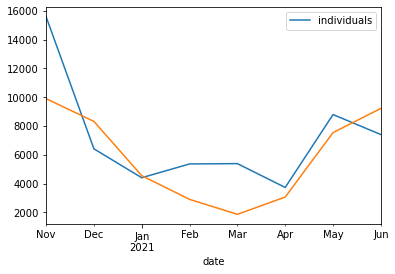

In [93]:
test.plot()
pred.plot()

In [95]:
error = sqrt(mean_squared_error(test,pred))
error

2734.3432639817274

In [46]:
df.to_csv('results.csv',sep=",", header=False)


In [47]:
test


,individuals
date,
2020-11-01,15589
2020-12-01,6411
2021-01-01,4405
2021-02-01,5362
2021-03-01,5384
2021-04-01,3729
2021-05-01,8791
2021-06-01,7402


In [48]:
pred

2020-11-01    9895.369457
2020-12-01    8315.542672
2021-01-01    4548.065390
2021-02-01    2902.883173
2021-03-01    1864.399978
2021-04-01    3063.803488
2021-05-01    7538.333984
2021-06-01    9218.971928
Freq: MS, dtype: float64

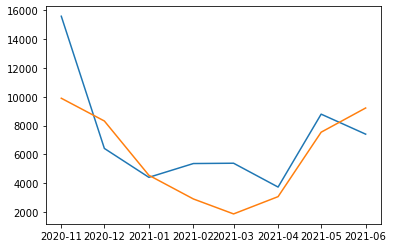

In [49]:
pyplot.plot(test)
pyplot.plot(pred)


In [50]:
rms = sqrt(mean_squared_error(test,pred))
rms



NameError: name 'sqrt' is not defined

Autoregression Modell


Als nächstes ein ARIMA Modell mit Auto Arima um die Parameter P D Q zu schätzen

In [99]:
#from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima



In [119]:
#arima_model = ARIMA(train, order=(1,1,1))
#arima_fit = arima_model.fit()

model =  auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True,seasonal=True, stepwise=True)
model_fit = model.fit(train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1526.386, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1539.516, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1530.734, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1534.715, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1537.526, Time=0.00 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1524.384, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1523.844, Time=0.02 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1525.897, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1532.052, Time=0.02 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1521.748, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1532.696, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1522.309, Time=0.03 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=1522.474, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : 

In [120]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   70
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -757.874
Date:                Thu, 15 Jul 2021   AIC                           1521.748
Time:                        22:39:02   BIC                           1528.451
Sample:                             0   HQIC                          1524.407
                                 - 70                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4590      0.101      4.544      0.000       0.261       0.657
ma.L2          0.4734      0.147      3.226      0.001       0.186       0.761
sigma2      1.961e+08   2.56e-10   7.66e+17      0.000    1.96e+08    1.96e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):              1024.90
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                            -2.57
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.4e+33. Standard errors may be unstable.
"""

In [112]:
# Y = (Auto-Regressive Parameters) + (Moving Average Parameters)

forecast = model_fit.predict(n= 7)
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

ValueError: Shape of passed values is (10, 1), indices imply (8, 1)

In [121]:
#pred_arima = arima_fit.forecast(steps=1)[0]
pyplot.plot(test)
pyplot.plot(forecast)



ValueError: view limit minimum -36897.1 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [61]:
rms2 = sqrt(mean_squared_error(test,forecast))
rms2

9019.689962110673

In [62]:
from statsmodels.tsa.arima_model import ARIMA

In [63]:
arima_model = ARIMA(df, order=(0,1,2))
arima_fit = arima_model.fit(disp=1)

C:\Users\hornd\AppData\Local\R-MINI~1\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


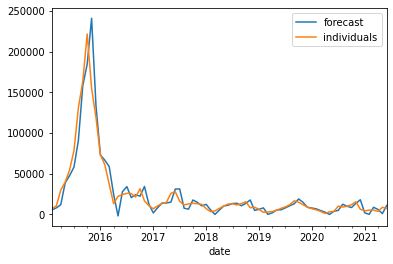

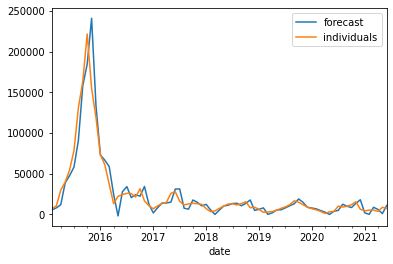

In [64]:
arima_fit.plot_predict(dynamic=False)

In [487]:
train.size

70

In [488]:
test.size

8

In [523]:
train = df[0:62]
# last 8 values
test = df[70:]

In [524]:
arima_model_2 = ARIMA(train, order=(0,1,2))
arima_fit2 = arima_model_2.fit(disp=0)

C:\Users\hornd\AppData\Local\R-MINI~1\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


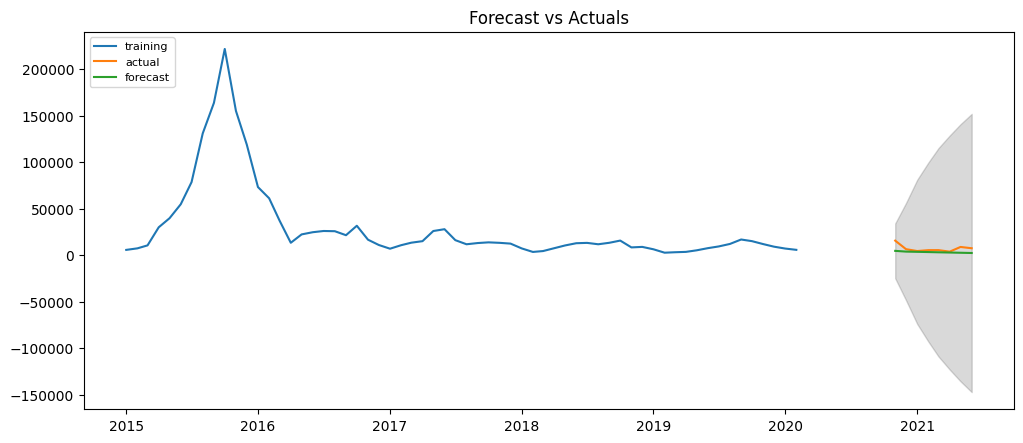

In [525]:
fc, se, conf = arima_fit2.forecast(8, alpha=0.05)  # 95% conf

# Make as pandas series
forecast_df = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
pyplot.figure(figsize=(12,5), dpi=100)
pyplot.plot(train, label='training')
pyplot.plot(test, label='actual')
pyplot.plot(forecast_df, label='forecast')
pyplot.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
pyplot.title('Forecast vs Actuals')
pyplot.legend(loc='upper left', fontsize=8)
pyplot.show()

In [526]:
error = sqrt(mean_squared_error(test,forecast_df))

In [527]:
error

5052.300484788493

In [528]:
forecast_df

date
2020-11-01    4584.591079
2020-12-01    3802.151781
2021-01-01    3551.479200
2021-02-01    3300.806618
2021-03-01    3050.134037
2021-04-01    2799.461456
2021-05-01    2548.788874
2021-06-01    2298.116293
Freq: MS, dtype: float64

In [495]:
test

,individuals
date,
2020-11-01,15589
2020-12-01,6411
2021-01-01,4405
2021-02-01,5362
2021-03-01,5384
2021-04-01,3729
2021-05-01,8791
2021-06-01,7402


In [1]:
df

NameError: name 'df' is not defined